In [1]:
import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict



In [2]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("barthelemymp/pf72 phylotree")

summary_list, config_list, name_list, dir_list = [], [], [], []
for run in runs:

    dir_list.append(run.dir.split("//")[-1])
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

In [50]:
runs_df.tail()

,summary,config,name
137,"{'Train lossRoot': 199.74453685731285, '_step'...",{},blooming-flower-27
138,"{'_timestamp': 1637685899, 'Test loss486': 176...",{},prime-galaxy-26
139,"{'_step': 1895, 'epoch': 474, 'Test loss196': ...",{},laced-shadow-25
140,"{'Test loss196': 219.16128159141687, 'Test los...",{},summer-cherry-24
141,"{'_runtime': 2076, 'Test loss196': 203.4637474...",{},effortless-snow-23


In [7]:
config_list

[{'layers': '512 256 128',
  'familly': 'pf72(196 486 512)',
  'scheduler': 'No scheduler',
  'batch size': 'Full batch',
  'weight_decay': 0.01,
  'gamma manager': 'Constant'},
 {'layers': '512 256 128',
  'familly': 'pf72(196 486 512)',
  'scheduler': 'No scheduler',
  'batch size': 'Full batch',
  'weight_decay': 0.01,
  'gamma manager': 'Constant'},
 {'layers': '512 256 128',
  'familly': 'pf72(196 486 512)',
  'scheduler': 'No scheduler',
  'batch size': 'Full batch',
  'weight_decay': 0.01,
  'gamma manager': 'Constant'},
 {'layers': '512 256 128',
  'familly': 'pf72(196 486 512)',
  'scheduler': 'No scheduler',
  'batch size': 'Full batch',
  'weight_decay': 0.01,
  'gamma manager': 'Constant'},
 {'layers': '512 256 128',
  'familly': 'pf72(196 486 512)',
  'scheduler': 'No scheduler',
  'batch size': 'Full batch',
  'weight_decay': 0.01,
  'gamma manager': 'Constant'},
 {'layers': '512 256 128',
  'familly': 'pf72(196 486 512)',
  'scheduler': 'No scheduler',
  'batch size': 'F

In [8]:
summary_list

[{'epoch': 2000,
  '_runtime': 196,
  'Test lossRoot': 216.1755862034326,
  'Train loss486': 177.41174568024093,
  'distance Loss486': 2.0108747482299805,
  'gamma children196': 0.5,
  '_step': 15999,
  '_wandb': {'runtime': 197},
  'Test loss196': 239.26846509510037,
  'distance Loss196': 2.0810046195983887,
  'gamma parents196': 0.5,
  'gamma parentsRoot': 0.5,
  'gamma childrenRoot': 0.5,
  '_timestamp': 1637965330,
  'Test loss486': 166.6829007931463,
  'Test loss512': 234.06715250359497,
  'Train loss512': 195.8501005315685,
  'distance Loss512': 2.527853012084961,
  'gamma parents512': 0.5,
  'Train loss196': 188.57499009313065,
  'Train lossRoot': 189.8353735890804,
  'gamma parents486': 0.5,
  'distance LossRoot': 0,
  'gamma children486': 0.5,
  'gamma children512': 0.5},
 {'Train loss486': 174.51857075503946,
  'epoch': 2000,
  'Test loss196': 232.60191710843787,
  'Test loss486': 166.59059570681148,
  'Train loss196': 185.35328118557095,
  'Train loss512': 194.8535090754351,

In [49]:
runs_df.loc[100]["summary"]

{'gamma parentsRoot': 0.0010000000474974513,
 '_wandb': {'runtime': 219},
 'Test loss196': 269.3871605533102,
 'Train loss486': 134.45877323401584,
 'distance Loss486': 7476.845703125,
 'distance LossRoot': 0,
 'gamma children512': 0.0010000000474974513,
 'Train loss512': 158.24256787249155,
 'Train lossRoot': 179.14792510940555,
 'gamma parents196': 0.0010000000474974513,
 'gamma children486': 0.0010000000474974513,
 'gamma childrenRoot': 0.0010000000474974513,
 '_step': 15999,
 '_timestamp': 1637943983,
 'Test lossRoot': 221.78946534124384,
 'distance Loss196': 7676.55908203125,
 'distance Loss512': 6987.03466796875,
 'gamma parents486': 0.0010000000474974513,
 'gamma children196': 0.0010000000474974513,
 'epoch': 2000,
 '_runtime': 218,
 'Test loss486': 173.58340147847716,
 'Test loss512': 251.81576220133948,
 'Train loss196': 147.07187670313607,
 'gamma parents512': 0.0010000000474974513}

In [70]:
run = api.run("barthelemymp/pf72 phylotree/15clfmma")
history = run.scan_history()
# losses = [row["Test loss512"] for row in history]

In [71]:
run.config['weight_decay']

{'layers': '512 256 128',
 'familly': 'pf72(196 486 512)',
 'scheduler': 'No scheduler',
 'batch size': 'Full batch',
 'weight_decay': 0.01,
 'gamma manager': 'Constant'}

In [20]:
for rundir in dir_list:
    run = api.run("barthelemymp/pf72 phylotree/"+rundir)
    history = run.scan_history()
    

In [59]:
system_metrics = run.history(stream="Loss")

In [60]:
system_metrics

,system.network.sent,system.gpu.0.powerPercent,system.network.recv,system.gpu.2.temp,system.gpu.process.2.temp,system.gpu.process.2.memoryAllocated,system.gpu.1.temp,system.disk,system.gpu.0.powerWatts,system.gpu.2.powerWatts,...,system.memory,system.gpu.2.memoryAllocated,system.proc.memory.percent,system.gpu.1.powerWatts,system.gpu.2.gpu,system.gpu.1.powerPercent,system.gpu.2.powerPercent,system.gpu.process.2.gpu,system.gpu.0.memoryAllocated,_timestamp
0,448143,5.25,81309,54.60,54.60,41.44,58.33,97.7,14.69,171.32,...,9.7,41.44,0.06,247.58,42.00,88.42,61.18,42.00,99.68,1637965164
1,973494,5.30,163025,56.07,56.07,41.44,58.80,97.7,14.85,183.05,...,9.7,41.44,0.07,243.38,48.33,86.92,65.38,48.33,99.68,1637965195
2,1451668,5.35,221607,55.67,55.67,41.44,59.73,97.7,14.99,180.31,...,9.7,41.44,0.07,269.22,46.73,96.15,64.39,46.73,99.68,1637965226
3,1935570,5.29,270693,55.87,55.87,41.44,59.87,97.7,14.82,180.44,...,9.7,41.44,0.07,262.60,47.00,93.79,64.44,47.00,99.68,1637965257
4,2420332,5.34,322241,56.13,56.13,41.44,59.07,97.7,14.96,181.52,...,9.7,41.44,0.07,248.62,46.73,88.79,64.83,46.73,99.68,1637965288
5,2902820,5.38,370609,55.93,55.93,41.44,58.93,97.7,15.07,182.56,...,9.7,41.44,0.07,250.59,46.93,89.50,65.20,46.93,99.68,1637965319
6,3064984,5.34,382589,55.17,55.17,41.44,58.50,97.7,14.94,167.88,...,9.7,41.44,0.07,245.31,39.50,87.61,59.96,39.50,99.68,1637965332


In [61]:
for row in history:
    print(row)
    if row["epoch"]==3:
        break


{'gamma childrenRoot': 0.5, '_step': 0, '_runtime': 2, 'Train lossRoot': 341.7676815884596, 'gamma parentsRoot': 0.5, 'epoch': 1, '_timestamp': 1637965136, 'distance LossRoot': 0}
{'distance Loss196': 2139.349609375, '_step': 1, 'gamma children196': 0.5, 'gamma parents196': 0.5, '_runtime': 2, 'epoch': 1, 'Train loss196': 342.1603972427445, '_timestamp': 1637965136}
{'_step': 2, '_runtime': 2, 'gamma children486': 0.5, 'distance Loss486': 2138.987548828125, 'epoch': 1, 'Train loss486': 342.4103650636202, 'gamma parents486': 0.5, '_timestamp': 1637965136}
{'distance Loss512': 2122.1171875, '_step': 3, 'Train loss512': 342.32967601828585, '_runtime': 2, 'epoch': 1, 'gamma children512': 0.5, 'gamma parents512': 0.5, '_timestamp': 1637965136}
{'Test lossRoot': 340.9082975742468, '_step': 4, '_runtime': 2, 'epoch': 1, '_timestamp': 1637965136}
{'_step': 5, '_runtime': 2, 'epoch': 1, 'Test loss196': 341.47924133385175, '_timestamp': 1637965136}
{'_step': 6, '_runtime': 2, 'epoch': 1, 'Test l

In [52]:
r

{'gamma childrenRoot': 0.5,
 '_step': 0,
 '_runtime': 2,
 'Train lossRoot': 341.7676815884596,
 'gamma parentsRoot': 0.5,
 'epoch': 1,
 '_timestamp': 1637965136,
 'distance LossRoot': 0}

In [55]:

for run in runs:
    r = run
    break

In [34]:
for s in r.__dict__:
    print(s)

_attrs
client
_entity
project
_files
_base_dir
sweep
dir
_summary
_state
user


'15clfmma'

In [3]:
def getCurves(run):
    runDict = {'gamma childrenRoot':[],
                'Train lossRoot': [],
                'gamma parentsRoot': [],
                'distance Loss196': [], 
                'Train loss196': [],
                'distance Loss486': [], 
                'Train loss486': [],
                'distance Loss512': [], 
                'Train loss512': [],
                'Test lossRoot': [],
                'Test loss196': [],
                'Test loss486': [],
                'Test loss512': [],
                'weight_decay':run.config['weight_decay']}

    history = run.scan_history()
    for row in history:
        for k in row.keys():
            if k in runDict.keys():
                runDict[k].append(row[k])
    return runDict


In [4]:


def def_value():
    return defaultdict(def_value)

TrainlossRoot= defaultdict(def_value)
distanceLoss196= defaultdict(def_value)
Trainloss196= defaultdict(def_value)
distanceLoss486= defaultdict(def_value)
Trainloss486= defaultdict(def_value)
distanceLoss512= defaultdict(def_value)
Trainloss512= defaultdict(def_value)
TestlossRoot= defaultdict(def_value)
Testloss196= defaultdict(def_value)
Testloss486= defaultdict(def_value)
Testloss512= defaultdict(def_value)
# for rundir in dir_list:
#     run = api.run("barthelemymp/pf72 phylotree/"+rundir)
for run in runs:
    print(run.name)
    history = run.scan_history()
    dicrun = getCurves(run)
    TrainlossRoot[dicrun['weight_decay']][round(dicrun['gamma childrenRoot'][0],5)][round(dicrun['gamma parentsRoot'][0],5)]  = dicrun['Train lossRoot']
    distanceLoss196[dicrun['weight_decay']][round(dicrun['gamma childrenRoot'][0],5)][round(dicrun['gamma parentsRoot'][0],5)]  = dicrun['distance Loss196']
    Trainloss196[dicrun['weight_decay']][round(dicrun['gamma childrenRoot'][0],5)][round(dicrun['gamma parentsRoot'][0],5)]  = dicrun['Train loss196']
    distanceLoss486[dicrun['weight_decay']][round(dicrun['gamma childrenRoot'][0],5)][round(dicrun['gamma parentsRoot'][0],5)]  = dicrun['distance Loss486']
    Trainloss486[dicrun['weight_decay']][round(dicrun['gamma childrenRoot'][0],5)][round(dicrun['gamma parentsRoot'][0],5)]  = dicrun['Train loss486']
    distanceLoss512[dicrun['weight_decay']][round(dicrun['gamma childrenRoot'][0],5)][round(dicrun['gamma parentsRoot'][0],5)]  = dicrun['distance Loss512']
    Trainloss512[dicrun['weight_decay']][round(dicrun['gamma childrenRoot'][0],5)][round(dicrun['gamma parentsRoot'][0],5)]  = dicrun['Train loss512']
    TestlossRoot[dicrun['weight_decay']][round(dicrun['gamma childrenRoot'][0],5)][round(dicrun['gamma parentsRoot'][0],5)]  = dicrun['Test lossRoot']
    Testloss196[dicrun['weight_decay']][round(dicrun['gamma childrenRoot'][0],5)][round(dicrun['gamma parentsRoot'][0],5)]  = dicrun['Test loss196']
    Testloss486[dicrun['weight_decay']][round(dicrun['gamma childrenRoot'][0],5)][round(dicrun['gamma parentsRoot'][0],5)]  = dicrun['Test loss486']
    Testloss512[dicrun['weight_decay']][round(dicrun['gamma childrenRoot'][0],5)][round(dicrun['gamma parentsRoot'][0],5)]  = dicrun['Test loss512']

    
    
    

dark-totem-167
crisp-sunset-166
feasible-darkness-165
lyric-water-164
absurd-shadow-163
flowing-shape-162
usual-morning-161
toasty-forest-160
worthy-salad-159
azure-lion-158
stoic-tree-157
driven-microwave-156
electric-silence-155
deep-planet-154
still-eon-153
treasured-fire-152
charmed-lake-151
expert-butterfly-150
fresh-smoke-149
worthy-deluge-148
dark-yogurt-147
vague-energy-146
glad-lion-145
dark-planet-144
peachy-glade-143
brisk-glitter-142
likely-dream-141
likely-leaf-140
valiant-snowball-139
happy-wave-138
grateful-vortex-137
copper-smoke-136
iconic-microwave-135
efficient-star-134
robust-lake-133
noble-gorge-132
different-frog-131
robust-sea-130
glamorous-sky-129
wandering-firefly-128
good-waterfall-127
toasty-shadow-126
valiant-feather-125
upbeat-fog-124
woven-sponge-123
devout-dew-122
true-star-121
snowy-universe-120
floral-darkness-119
classic-plasma-118
lilac-donkey-117
absurd-wind-116
graceful-silence-115
different-water-114
different-snowflake-113
toasty-capybara-112
char

IndexError: list index out of range

In [128]:
weight_decay = 0.0
gamma_children = 0.0
gamma_parent = 0.0

TrainlossRoot.keys()#[weight_decay][gamma_children][gamma_parent]

dict_keys([0.01, 0.001, 0])

In [129]:
gamma_list = [0, 0.001, 0.005, 0.01, 0.1, 0.5]
weight_decay_list = [0,0.001,0.01]

<Figure size 6400x6400 with 0 Axes>

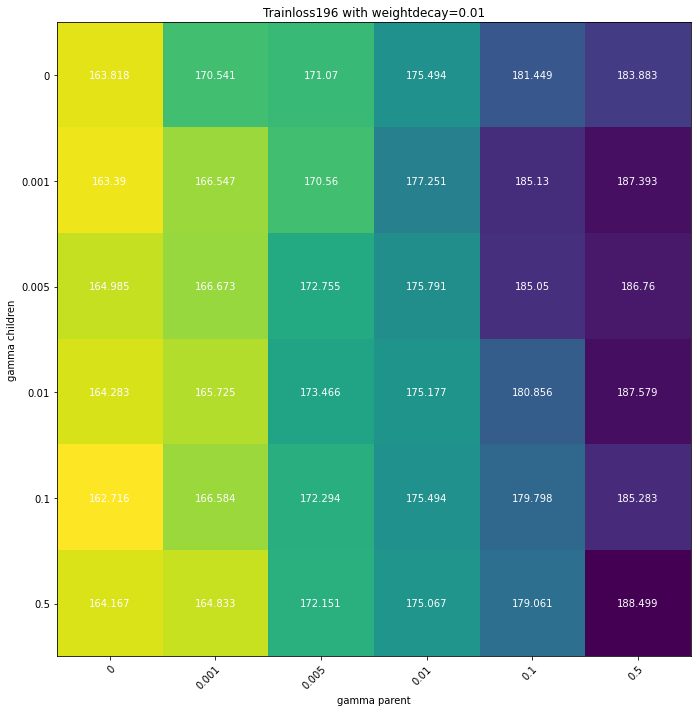

<Figure size 6400x6400 with 0 Axes>

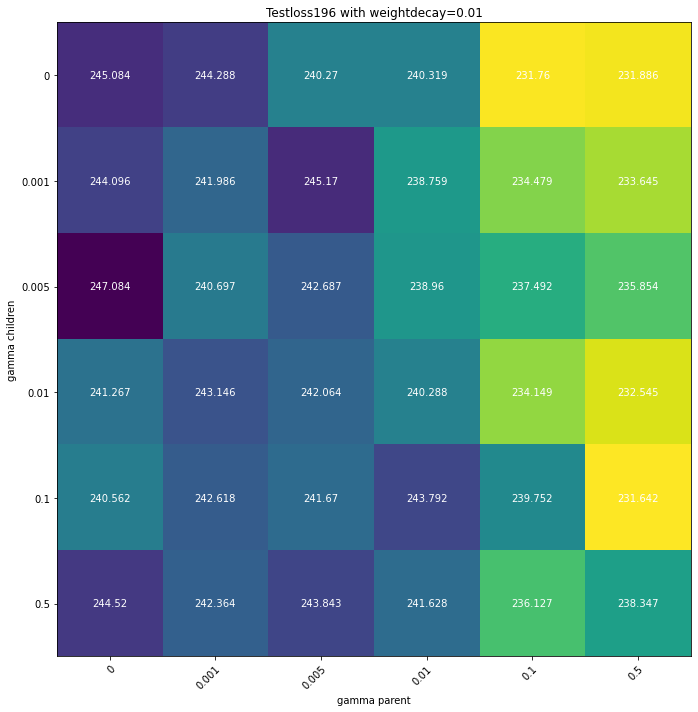

In [146]:
weight_decay = 0.01
hm = np.zeros((len(gamma_list),len(gamma_list)))
for gc in range(len(gamma_list)):
    for gp in range(len(gamma_list)):
        gamma_children = gamma_list[gc]
        gamma_parent = gamma_list[gp]
        hm[gc,gp] = -1*min(Trainloss196[weight_decay][gamma_children][gamma_parent])

from matplotlib.pyplot import figure

figure(figsize=(80, 80), dpi=80)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(hm)

ax.set_xticks(np.arange(len(gamma_list)))
ax.set_xticklabels(gamma_list)
ax.set_yticks(np.arange(len(gamma_list)))
ax.set_yticklabels(gamma_list)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(gamma_list)):
    for j in range(len(gamma_list)):
        text = ax.text(j, i, round(-1*hm[i, j],3),
                       ha="center", va="center", color="w")
ax.set_title("Trainloss196 with weightdecay=" +str(weight_decay))
ax.set_xlabel("gamma parent")
ax.set_ylabel("gamma children")
fig.tight_layout()
plt.show()





hm = np.zeros((len(gamma_list),len(gamma_list)))
for gc in range(len(gamma_list)):
    for gp in range(len(gamma_list)):
        gamma_children = gamma_list[gc]
        gamma_parent = gamma_list[gp]
        hm[gc,gp] = -1*min(Testloss196[weight_decay][gamma_children][gamma_parent])

from matplotlib.pyplot import figure

figure(figsize=(80, 80), dpi=80)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(hm)

ax.set_xticks(np.arange(len(gamma_list)))
ax.set_xticklabels(gamma_list)
ax.set_yticks(np.arange(len(gamma_list)))
ax.set_yticklabels(gamma_list)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(gamma_list)):
    for j in range(len(gamma_list)):
        text = ax.text(j, i, round(-1*hm[i, j],3),
                       ha="center", va="center", color="w")
ax.set_title("Testloss196 with weightdecay=" +str(weight_decay))
ax.set_xlabel("gamma parent")
ax.set_ylabel("gamma children")
fig.tight_layout()
plt.show()

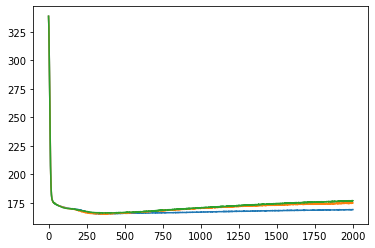

In [160]:
weight_decay = 0.001
gamma_children = 0.1
gamma_parent = 0.1

plt.plot(Testloss486[0.01][0][0])
plt.plot(Testloss486[0.001][0][0])
plt.plot(Testloss486[0.0][0][0])

# plt.plot(Testloss486[0.0][gamma_children][gamma_parent])
# plt.plot(Testloss486[0.001][gamma_children][gamma_parent])
# plt.plot(Testloss486[0.01][gamma_children][gamma_parent])

<Figure size 6400x6400 with 0 Axes>

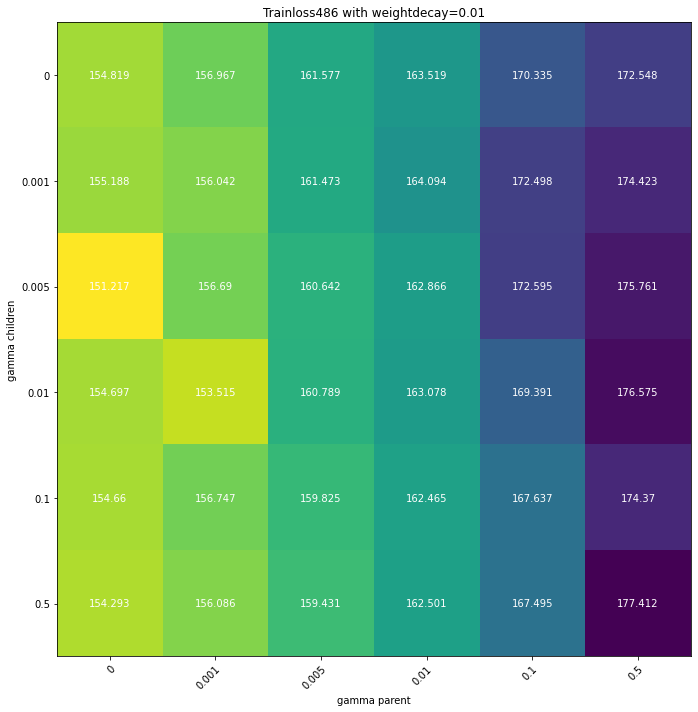

<Figure size 6400x6400 with 0 Axes>

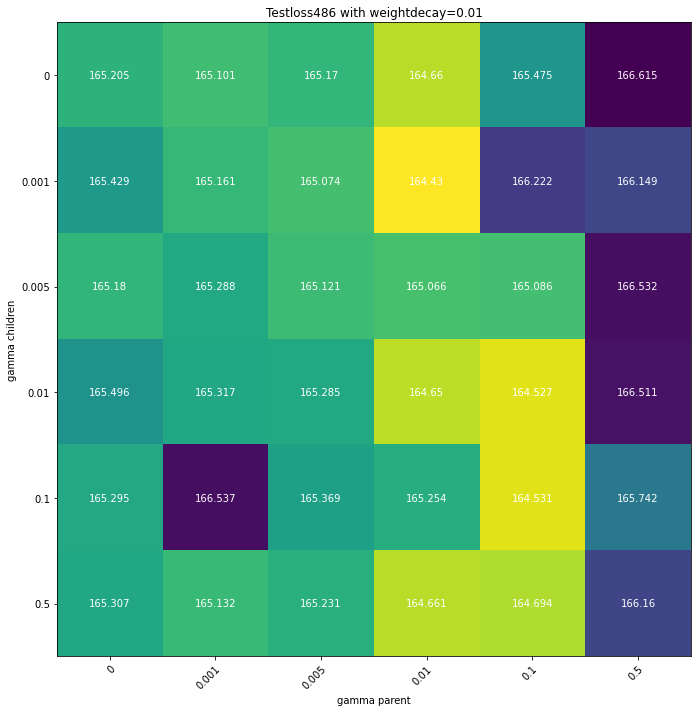

In [153]:
weight_decay = 0.01
hm = np.zeros((len(gamma_list),len(gamma_list)))
for gc in range(len(gamma_list)):
    for gp in range(len(gamma_list)):
        gamma_children = gamma_list[gc]
        gamma_parent = gamma_list[gp]
        hm[gc,gp] = -1*min(Trainloss486[weight_decay][gamma_children][gamma_parent])

from matplotlib.pyplot import figure

figure(figsize=(80, 80), dpi=80)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(hm)

ax.set_xticks(np.arange(len(gamma_list)))
ax.set_xticklabels(gamma_list)
ax.set_yticks(np.arange(len(gamma_list)))
ax.set_yticklabels(gamma_list)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(gamma_list)):
    for j in range(len(gamma_list)):
        text = ax.text(j, i, round(-1*hm[i, j],3),
                       ha="center", va="center", color="w")
ax.set_title("Trainloss486 with weightdecay=" +str(weight_decay))
ax.set_xlabel("gamma parent")
ax.set_ylabel("gamma children")
fig.tight_layout()
plt.show()





hm = np.zeros((len(gamma_list),len(gamma_list)))
for gc in range(len(gamma_list)):
    for gp in range(len(gamma_list)):
        gamma_children = gamma_list[gc]
        gamma_parent = gamma_list[gp]
        hm[gc,gp] = -1*min(Testloss486[weight_decay][gamma_children][gamma_parent])

from matplotlib.pyplot import figure

figure(figsize=(80, 80), dpi=80)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(hm)

ax.set_xticks(np.arange(len(gamma_list)))
ax.set_xticklabels(gamma_list)
ax.set_yticks(np.arange(len(gamma_list)))
ax.set_yticklabels(gamma_list)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(gamma_list)):
    for j in range(len(gamma_list)):
        text = ax.text(j, i, round(-1*hm[i, j],3),
                       ha="center", va="center", color="w")
ax.set_title("Testloss486 with weightdecay=" +str(weight_decay))
ax.set_xlabel("gamma parent")
ax.set_ylabel("gamma children")
fig.tight_layout()
plt.show()

<Figure size 6400x6400 with 0 Axes>

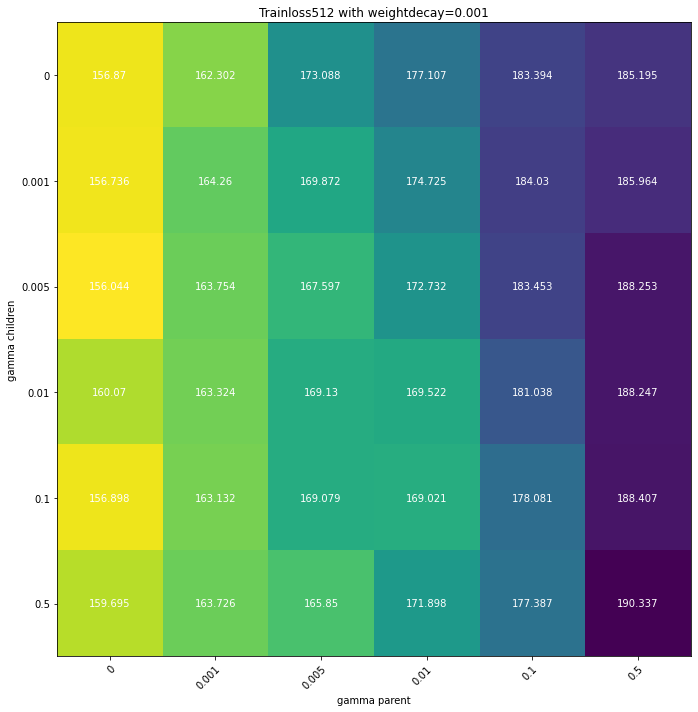

<Figure size 6400x6400 with 0 Axes>

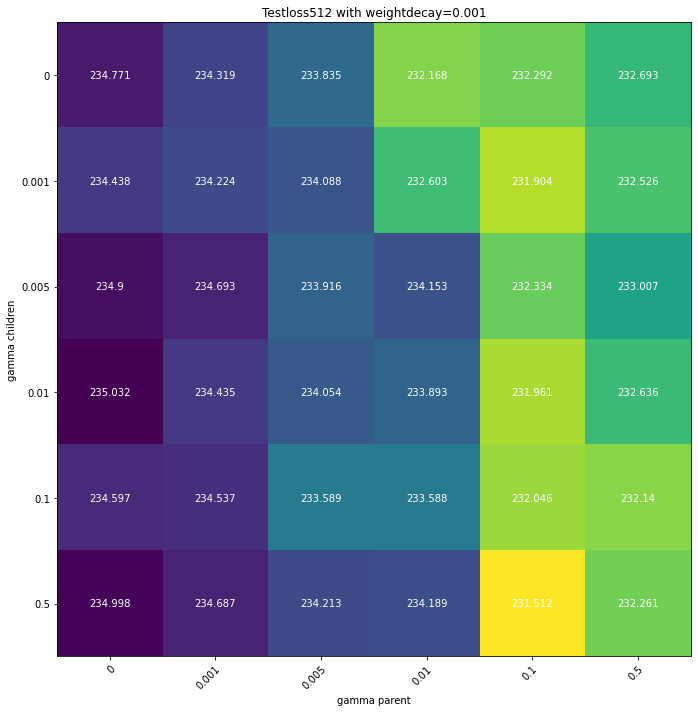

In [143]:
weight_decay = 0.001
hm = np.zeros((len(gamma_list),len(gamma_list)))
for gc in range(len(gamma_list)):
    for gp in range(len(gamma_list)):
        gamma_children = gamma_list[gc]
        gamma_parent = gamma_list[gp]
        hm[gc,gp] = -1*min(Trainloss512[weight_decay][gamma_children][gamma_parent])

from matplotlib.pyplot import figure

figure(figsize=(80, 80), dpi=80)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(hm)

ax.set_xticks(np.arange(len(gamma_list)))
ax.set_xticklabels(gamma_list)
ax.set_yticks(np.arange(len(gamma_list)))
ax.set_yticklabels(gamma_list)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(gamma_list)):
    for j in range(len(gamma_list)):
        text = ax.text(j, i, round(-1*hm[i, j],3),
                       ha="center", va="center", color="w")
ax.set_title("Trainloss512 with weightdecay=" +str(weight_decay))
ax.set_xlabel("gamma parent")
ax.set_ylabel("gamma children")
fig.tight_layout()
plt.show()





hm = np.zeros((len(gamma_list),len(gamma_list)))
for gc in range(len(gamma_list)):
    for gp in range(len(gamma_list)):
        gamma_children = gamma_list[gc]
        gamma_parent = gamma_list[gp]
        hm[gc,gp] = -1*min(Testloss512[weight_decay][gamma_children][gamma_parent])

from matplotlib.pyplot import figure

figure(figsize=(80, 80), dpi=80)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(hm)

ax.set_xticks(np.arange(len(gamma_list)))
ax.set_xticklabels(gamma_list)
ax.set_yticks(np.arange(len(gamma_list)))
ax.set_yticklabels(gamma_list)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(gamma_list)):
    for j in range(len(gamma_list)):
        text = ax.text(j, i, round(-1*hm[i, j],3),
                       ha="center", va="center", color="w")
ax.set_title("Testloss512 with weightdecay=" +str(weight_decay))
ax.set_xlabel("gamma parent")
ax.set_ylabel("gamma children")
fig.tight_layout()
plt.show()

In [119]:
hm[0,0]

165.56318507045813

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()